<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_Sprint_II_Malwares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Machine Learning - Sprint II**

Carregando  e imprimindo o dataset "Adult", obtido no UCI Repository. Ele representa o "Adult Census" estadunidense.

In [42]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
url = '/content/BitcoinHeistData.csv'
dataset = pd.read_csv(url).sort_values(by='year', ascending=False)
dataset.dropna(inplace=True)
display(dataset)
missings = dataset.isnull().sum()
display(missings)

,address,year,day,length,weight,count,looped,neighbors,income,label
2916696,3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e,2018,330,144,7.397241e-02,6800,0,2,1.123500e+08,white
2696670,3CVYuTnL1scRKYreW3xopdoU1j1sXFGYkT,2018,110,0,1.000000e+00,1,0,1,3.868020e+07,white
2696692,1HGQqx4NsVARAyBBmsYw7syJrU8yuA9F4t,2018,110,144,4.564501e-01,6646,6645,6,8.695260e+08,white
2696693,1G7PE2v2fC1DwACFTgWB6rhvMsHvCaFFzq,2018,110,0,5.000000e-01,1,0,2,1.236000e+08,white
2696694,3LG8CnH2hj562dByDUf9K6w3mths7puiMW,2018,110,42,3.051758e-05,1,0,2,6.106216e+07,white
...,...,...,...,...,...,...,...,...,...,...
264469,17zdq9qgSJsZ42UnoqbDiBy1QxmovrbH6T,2011,233,46,2.384186e-07,1,0,1,5.600000e+07,white
264470,1FTexxxa7u2bFDTTwXs1XzxMPE1MVvPCJj,2011,233,4,2.500000e-01,1,0,1,1.010693e+08,white
264471,1CgBrY6DijesC2Rxch3GJxjowcp1E1q1Eu,2011,233,0,1.000000e+00,1,0,2,1.000000e+09,white
264472,15h1uU1TxM3ke5cdJ4Fizgy4ZAQxGVeE1r,2011,233,28,2.590880e-04,52,0,1,1.000000e+08,white


address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

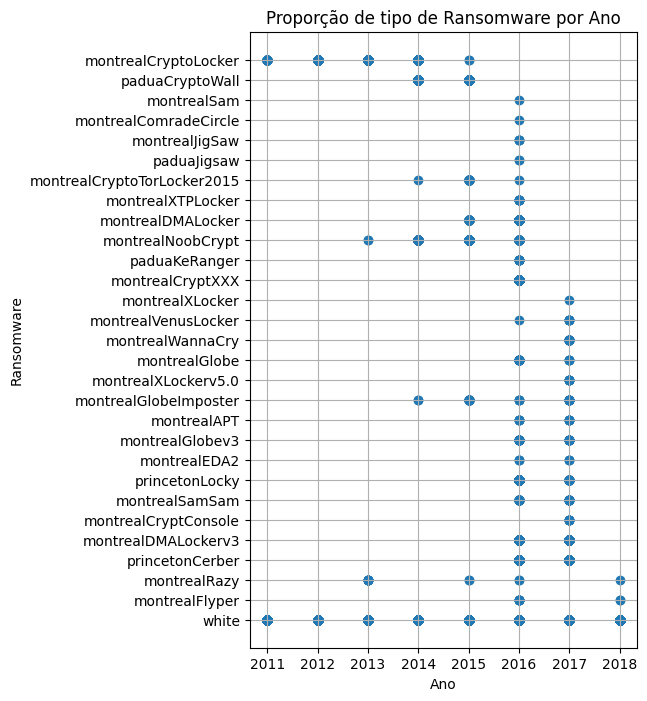

In [49]:
#Verificando a proporção de tipo de Ransomware por ano:
df = dataset[["year", "label"]]
plt.figure(figsize=(5,8))
y = df['label']
x = df['year']
plt.scatter(x, y)
#df.plot(kind='scatter', subplots=True)
plt.title("Proporção de tipo de Ransomware por Ano")
plt.xlabel("Ano")
plt.ylabel("Ransomware")
plt.grid(True)
plt.show()


In [50]:
array = dataset.values
#X = array[:,[1,3,5,11,12,13]]
X = array[:,1:7]
#padronizando os dados numéricos:
#avg = np.mean(X)
#std = np.std(X)
#X_std = (X - std) / std
#normalizando os dados, pois muitos deram números negativos:
#max = np.max(X_std)
#min = np.min(X_std)
#X_norm = (X_std - min) / (max - min)
y = array[:,9]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.20, random_state=7)
#X_norm_train, X_norm_test, y_train, y_test, = train_test_split(X_norm, y, test_size=0.20, random_state=7)
display(X)

array([[2018, 330, 144, 0.0739724122705657, 6800, 0],
       [2018, 110, 0, 1.0, 1, 0],
       [2018, 110, 144, 0.456450075521819, 6646, 6645],
       ...,
       [2011, 233, 0, 1.0, 1, 0],
       [2011, 233, 28, 0.000259088010204, 52, 0],
       [2011, 240, 0, 1.0, 1, 0]], dtype=object)

In [51]:
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7)
models = []
results = []
names = []
models.append(('LR', LinearRegression()))
#models.append(('Ridge', Ridge()))
#models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('KNN', KNeighborsRegressor()))
#models.append(('CART', DecisionTreeRegressor()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


for name, model in models:
  #cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  #cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='accuracy')
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
#  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação entre o MSE dos modelos')
#fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



ValueError: ignored

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_norm_train, y_train)
predictions = model.predict(X_norm_test)
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))


MSE 57649014330341105664.00
RMSE 7592694800.29
